In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

В файле `data/weather.csv` находит архив погоды в г. Санкт-Петербург с 1 января 2008 года по 31 декабря 2016 года. Файл состоит из двух столбцов - дата (**Day**) и средняя дневная температура в этот день (**t**). Прочитать данные в `pandas` можно с помощью кода:

In [2]:
df = pd.read_csv('../data/weather.csv', encoding='utf-8', index_col=False, parse_dates=[0])

In [3]:
df.head(5)

,Day,t
0,2008-01-01,0
1,2008-01-02,-5
2,2008-01-03,-11
3,2008-01-04,-11
4,2008-01-05,-12


С помощью `Pandas` решите следующие задачи

**1.** Определите самый холодный год, в котором среднеяя температура была минимальная и самый теплый год. 

In [4]:
df['Year'] = df.Day.dt.year
df['Month'] = df.Day.dt.month

In [5]:
new_df = df[['Year', 't']].groupby('Year').mean()
print(new_df)
print('the coldest: ', new_df.idxmin()[0])
print('the hottest: ', new_df.idxmax()[0])

             t
Year          
2008  8.545205
2009  7.610959
2010  7.117808
2011  8.337912
2012  6.980822
2013  8.728767
2014  8.931507
2015  9.079452
2016  7.907104
the coldest:  2012
the hottest:  2015


**2.** Определите год, где в январе было наибольшее число дней с положительной температурой ($\text{t} \ge 0$).

In [6]:
df.loc[(df['t'] >= 0) & (df['Month'] == 1),
       ['t', 'Year']].groupby('Year').count().idxmax()[0]

2008

**3.** В каком году было самое холодное лето (по средней температуре)

In [7]:
summer_months =[6,7,8]
df.loc[df['Month'].isin(summer_months), ['t', 'Year']].groupby('Year').mean().idxmin()[0]

2008

**4.** Найдите день с самой большим перепадом температуры, если сравнивать со следующим днем. 

In [26]:
df['$\Delta$ t'] = df['t'] - df['t'].shift(-1)
print(df['Day'][df['$\Delta$ t'].abs().idxmax()])

2014-05-26 00:00:00


**5.** Постройте график среднегодовых температур (по оси $x$ - год, по оси $y$ - средняя температура в этот год).

<AxesSubplot:xlabel='Year'>

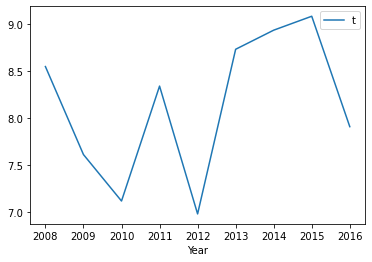

In [9]:
df[['t', 'Year']].groupby('Year').mean().plot()